In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import glob
import random
import os
from sklearn.metrics import f1_score

In [2]:
zero_images = glob.glob('alldataset/0/*.jpg')
one_images = glob.glob('alldataset/1/*.jpg')
two_images = glob.glob('alldataset/2/*.jpg')
all_images = zero_images + one_images + two_images
names = ['lp', 'dlp']

In [3]:
net = cv2.dnn.readNet('weights/yolov4-lp2_best.weights', 'yolov4-lp2.cfg')
net.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)
net.setPreferableTarget(cv2.dnn.DNN_TARGET_CPU)
model = cv2.dnn_DetectionModel(net)
model.setInputParams(size=(608, 608), scale=1/255)

/Users/sajjadaboutalebi/Documents/juplab/lp/alldataset/0/0907.jpg


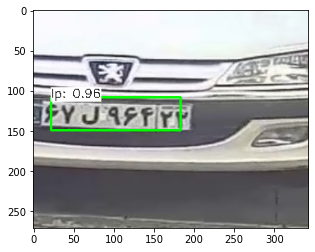

In [5]:
filename = random.choice(all_images)
print('/Users/sajjadaboutalebi/Documents/juplab/lp/'+filename)
img = cv2.imread(filename)
classes, confidences, boxes  = model.detect(img, 0.2, 0.2)
for class_id, confidence, box in zip(classes, confidences, boxes):
    label = '%.2f' % confidence
    label = '%s: %s' % (names[class_id[0]], label)
    labelSize, baseLine = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)
    left, top, width, height = box
    top = max(top, labelSize[1])
    cv2.rectangle(img, box, color=(0, 255, 0), thickness=2)
    cv2.rectangle(img, (left, top - labelSize[1]), (left + labelSize[0], top + baseLine), (255, 255, 255), cv2.FILLED)
    cv2.putText(img, label, (left, top), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [32]:
def cacl_f1(result):
    y_pred = []
    y_true = []
    for r in result:
        if len(result[r]['classes']) == 0:
            y_pred.append(2)
        if len(result[r]['classes']) > 1:
            y_pred.append(int(np.where(result[r]['confidences'] == max(result[r]['confidences']))[0]))
        if len(result[r]['classes']) == 1:
            y_pred.append(int(result[r]['classes']))
        if 'b' in r:
            y_true.append(1)
        if 'c' in r:
            y_true.append(2)
        if 'b' not in r and 'c' not in r:
            y_true.append(0)
    print(f1_score(y_true, y_pred, average='macro'))

In [36]:
def detect_images(images):
    result = {}
    for image in images:
        img = cv2.imread(image)
        classes, confidences, boxes  = model.detect(img, 0.4, 0.2)
        result[os.path.basename(image)] = {'classes': classes, 'confidences': confidences, 'boxes': boxes}
        print(len(result), end='\r')
    return result

In [13]:
all_result = detect_images(all_images)

In [33]:
cacl_f1(all_result)

0.9340606250973686


In [47]:
test_result = detect_images([f'yolodataset/{os.path.basename(f)}' for f in open('test.txt','r').read().split('\n')])

In [48]:
cacl_f1(test_result)

0.9023562329830664
